In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
df = pd.read_csv("../data/Data_Weather.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,...,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,...,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,...,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,...,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,...,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [18]:
df.shape


(145460, 23)

In [19]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:

df['RainTomorrow'].value_counts()



RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64

In [16]:
df['RainTomorrow'].value_counts(normalize=True) * 100

RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64

In [14]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [20]:
df.isnull().sum().sort_values(ascending=False)


Date             0
WindSpeed3pm     0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed9am     0
Location         0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
MinTemp          0
RainTomorrow     0
dtype: int64

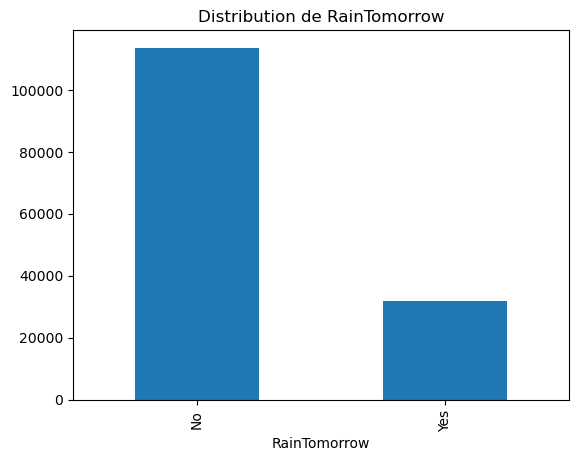

In [21]:
df['RainTomorrow'].value_counts().plot(kind='bar')
plt.title("Distribution de RainTomorrow")
plt.show()

In [22]:
df = df.drop(columns=['Location', 'Date'], errors='ignore')


In [23]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']


In [24]:
y = y.map({'Yes': 1, 'No': 0})


In [25]:
y.value_counts()


RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("Colonnes catégorielles :", categorical_cols)
print("Colonnes numériques :", numerical_cols)